In [ ]:
%matplotlib

In [ ]:
%matplotlib inline             # Pyplot 그래프 새창에서 열기 '취소' 옵션

In [2]:
pd.set_option('display.max_rows',    100)       # DataFrame 데이터 확인 시 최대 표시 행 수
pd.set_option('display.max_columns', 1400)      # DataFrame 데이터 확인 시 최대 표시 열 수

## 라이브러리 import

In [1]:
import numpy       as np
import pandas      as pd
import matplotlib.pyplot as plt
import pywt

## 데이터 불러오기

In [3]:
Data = pd.read_csv('./ExampleData', sep=',', header=None)
Data.shape

(2774, 4)

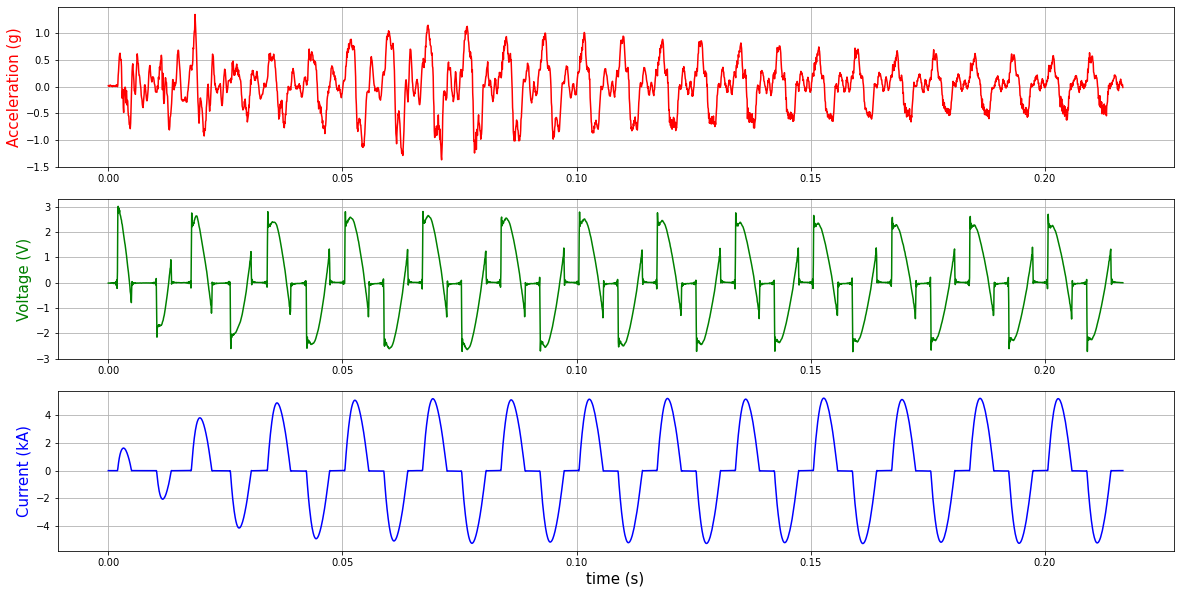

In [4]:
# 예제데이터 센서데이터 (1열 ~ 3열)
plt.figure(figsize=(20,10))

plt.subplot(3,1,1) # 가속도 데이터
plt.plot(Data.iloc[:,0] , Data.iloc[:,1], color='r')
plt.ylabel('Acceleration (g)',fontsize=15, color='r')
plt.grid()

plt.subplot(3,1,2)# 전압 데이터 
plt.plot(Data.iloc[:,0] , Data.iloc[:,2], color='g')
plt.ylabel('Voltage (V)',fontsize=15, color='g')
plt.grid()

plt.subplot(3,1,3) # 전류 데이터
plt.plot(Data.iloc[:,0] , Data.iloc[:,3], color=[0,0,1])
plt.ylabel('Current (kA)',fontsize=15, color='b')
plt.xlabel('time (s)',fontsize=15)
plt.grid()

plt.show()

## Wavelet Transform 수행

Wavelet Transfrom 실행 위한 파라미터 설정

In [5]:
MotherWavelet = pywt.Wavelet('haar')   # Mother wavelet (모함수) 지정
Level   = 8                            # Wavelet 분해 레벨 지정

Wavelet Transform 실행 : Coefficient 생성

In [6]:
Data_Target = Data.iloc[:,3] # 시계열 데이터 센서 종류 선택
Coefficient = pywt.wavedec(Data_Target, MotherWavelet, level=Level, axis=0)
Coefficient

[array([  4.26992783,   6.66263397,  -1.34075246, -11.24247645,
         -0.79702616,   8.23218576,   5.04577527,  -1.82390992,
        -11.84471759,  -0.82416584,  -0.12759591]),
 array([  0.94552441, -17.78790949, -24.07287283,   5.84255455,
         26.9179125 ,  15.28145751, -21.2702744 , -26.15620915,
          3.1102924 ,  27.41305526,  24.51479027]),
 array([  3.68151875, -11.99930709,  18.48045277, -13.62706087,
         -4.05279575,  20.59930941, -28.635726  ,  26.62634856,
        -14.4317252 ,  -4.46731598,  20.84096954, -28.98661476,
         26.92227231, -15.30213941,  -3.75213657,  20.75651691,
        -28.75646857,  26.50432015, -15.90700678,  -3.33094857,
         19.99391555, -17.45494855]),
 array([-4.24179651e+00,  8.77070500e-03, -4.18830932e+00, -1.01146784e+01,
         7.56562119e+00,  7.89008376e+00, -3.83896439e+00,  1.33659661e+01,
         1.51704280e+01, -9.83959096e+00, -5.72922845e+00,  4.89588206e+00,
        -1.38287980e+01, -1.66084199e+01,  1.05331294e

In [7]:
# 데이터 프레임 형태로 확인
Coefficient_df = pd.DataFrame(Coefficient)
Coefficient_df

0          1          2          3          4          5          6     \
0  4.269928   6.662634  -1.340752 -11.242476  -0.797026   8.232186   5.045775   
1  0.945524 -17.787909 -24.072873   5.842555  26.917912  15.281458 -21.270274   
2  3.681519 -11.999307  18.480453 -13.627061  -4.052796  20.599309 -28.635726   
3 -4.241797   0.008771  -4.188309 -10.114678   7.565621   7.890084  -3.838964   
4 -0.668559   1.812810   0.003497   0.007817   3.041196  -1.856968  -0.014072   
5 -0.003913  -0.939600  -0.343875   1.483201  -0.001892   0.001143   0.000266   
6 -0.001417  -0.001066   0.000766  -0.957867  -0.350548   0.088106   0.400205   
7 -0.000022  -0.000845  -0.000525  -0.000379  -0.000047   0.000947  -0.265154   
8 -0.000050  -0.000082  -0.000276  -0.000554   0.000093  -0.000013   0.000429   

        7          8          9          10         11         12    \
0  -1.823910 -11.844718  -0.824166  -0.127596        NaN        NaN   
1 -26.156209   3.110292  27.413055  24.514790        NaN        NaN   
2  26.626349 -14.431725  -4.467316  20.840970 -28.986615  26.922272   
3  13.365966  15.170428  -9.839591  -5.729228   4.895882 -13.828798   
4  -6.265128   6.301285   0.012173   7.285433  -3.845936  -0.876810   
5   0.002298   2.557346  -0.400250  -1.886435  -0.003284  -0.001029   
6   0.661743  -0.004456   0.000948   0.001030   0.000004   0.000064   
7  -0.310155  -0.174400  -0.076350  -0.002250   0.061850   0.118350   
8   0.000376  -0.000623  -0.002068  -0.002463  -0.001007   0.003817   

        13         14         15         16         17         18    \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2 -15.302139  -3.752137  20.756517 -28.756469  26.504320 -15.907007   
3 -16.608420  10.533129   5.553413  -5.007941  13.814961  16.212411   
4  -4.507330   0.670991   5.830009   0.150629   5.252637  -7.373643   
5  -0.005395  -3.898928  -0.518250   1.636750   2.481053   0.004179   
6  -0.000135   0.001748  -0.000200   0.559433   0.722561   0.076403   
7   0.165025   0.206445   0.255101  -0.005712  -0.000163   0.000291   
8  -0.168023  -0.125441  -0.094660  -0.069933  -0.051265  -0.034436   

        19         20         21         22         23         24        25    \
0        NaN        NaN        NaN        NaN        NaN        NaN       NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN       NaN   
2  -3.330949  19.993916 -17.454949        NaN        NaN        NaN       NaN   
3 -10.700542  -6.296387   5.072532 -13.841057 -16.383254  11.116059  6.657629   
4  -0.023908  -9.508222   4.870693   1.347488   5.528994  -0.869405 -6.053828   
5   0.004941   0.160479   3.189668  -0.300125  -2.263800  -1.223209 -0.006416   
6  -0.334850  -0.619107  -0.520572  -0.001270  -0.000917  -0.000431 -0.000969   
7   0.000277   0.000437   0.000277   0.000105   0.000054  -0.000036 -0.000186   
8  -0.019940  -0.008980   0.006364   0.016829   0.027365   0.038184  0.045891   

       26         27         28         29        30        31         32    \
0       NaN        NaN        NaN        NaN       NaN       NaN        NaN   
1       NaN        NaN        NaN        NaN       NaN       NaN        NaN   
2       NaN        NaN        NaN        NaN       NaN       NaN        NaN   
3 -4.878170  13.573254  16.082129 -11.346890 -7.111552  5.053538 -13.666768   
4 -0.658996  -4.451573   7.552865   0.024370  9.513327 -4.889820  -1.509143   
5 -0.007240  -4.394562  -1.209975   1.443700  2.894965  0.200539   0.009236   
6 -0.002182  -0.001911  -1.218569  -1.152902 -0.450073  0.060953   0.434765   
7  0.000172   0.000364   0.000757   0.000392  0.000043 -0.000120  -0.000767   
8  0.054518   0.060352   0.066235   0.078050  0.089237  0.099463  -0.011129   

        33         34        35        36         37         38         39    \
0        NaN        NaN       NaN       NaN        NaN        NaN        NaN   
1        NaN

각 WT Coefficent (주파수 영역별 신호) 별 데이터 사이즈 확인

In [8]:
print('Size of a',Level, ' = ', len(Coefficient[0]))  # 첫번째 Coefficient : 최저주파수 신호 (a-최대레벨) 분해를 할 수록 저주파 영역에서 분해한다

for i in range(1,Level+1):
    print('Size of d',Level+1-i , ' = ', len(Coefficient[i])) # 두번째 Coefficient(d-최대레벨) ~ 마지막 Coefficient(d1)
    

Size of a 8  =  11
Size of d 8  =  11
Size of d 7  =  22
Size of d 6  =  44
Size of d 5  =  87
Size of d 4  =  174
Size of d 3  =  347
Size of d 2  =  694
Size of d 1  =  1387


### Wavelet Decomposition 결과 그래프 확인

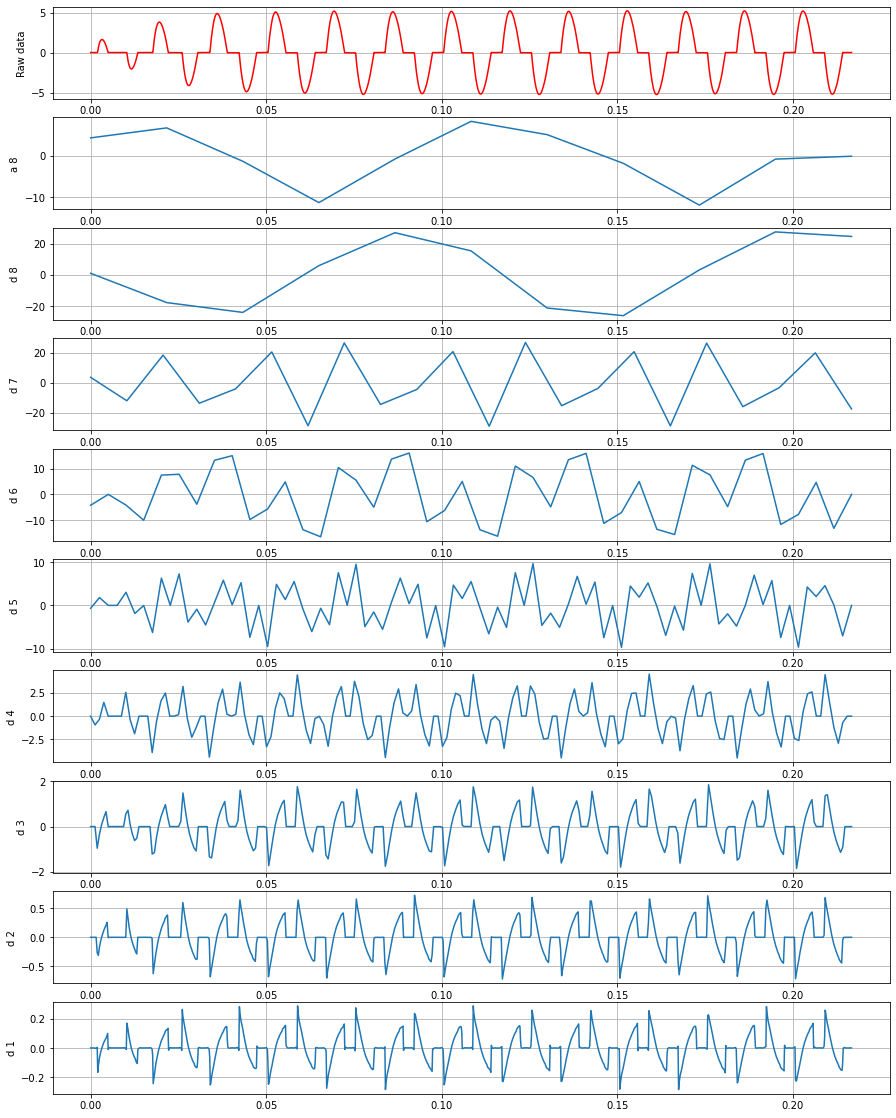

In [9]:
plt.figure(figsize=(15,20))

plt.subplot(Level+2,1,1)
plt.plot(Data.iloc[:,0], Data_Target, color='r')
plt.ylabel('Raw data')
plt.grid()

plt.subplot(Level+2,1,2)
Time_temp = np.arange( 0 , 0.2167 + 0.2167/(len(Coefficient[0])-1) , 0.2167/(len(Coefficient[0])-1) )
plt.plot(Time_temp , Coefficient[0])
plt.ylabel('a %d' %(Level))
plt.grid()

for k in range(1,Level+1):
    plt.subplot(Level+2,1,k+2)
    Time_temp = np.arange( 0 , 0.2167 + 0.2167/(len(Coefficient[k])-1) , 0.2167/(len(Coefficient[k])-1) )
    plt.plot(Time_temp , Coefficient[k])
    plt.ylabel('d %d'%(Level+1-k))
    plt.grid()

plt.show()